In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
import pandas as pd
import random
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import numpy as np
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Model

In [4]:
x = np.load('/content/drive/MyDrive/Datasets/fold2/images.npy')
y = np.load('/content/drive/MyDrive/Datasets/fold2/types.npy')


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 1)


In [6]:
print(x_train.shape, y_train.shape)

(2018, 256, 256, 3) (2018,)


In [7]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
#encoding y_train

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

y_train = onehot_encoded

[2 5 7 ... 6 3 0]


In [9]:
#encoding y_test

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)
#print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_test = onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train, y_train, test_size=.27, random_state=1)
x_train1, x_train3, y_train1, y_train3 = train_test_split(x_train1, y_train1, test_size=.50, random_state=1)


In [11]:
x_test, x_test2, y_test, y_test2 = train_test_split(x_test, y_test, test_size=0.5, random_state= 1)

In [12]:
print((x_train1.shape, y_train1.shape))
print((x_train2.shape, y_train2.shape))
print((x_train3.shape, y_train3.shape))
print((x_test.shape, y_test.shape))
#print((x_test1.shape, y_test1.shape))
print((x_test2.shape, y_test2.shape))

((736, 256, 256, 3), (736, 19))
((545, 256, 256, 3), (545, 19))
((737, 256, 256, 3), (737, 19))
((252, 256, 256, 3), (252, 19))
((253, 256, 256, 3), (253, 19))


In [ ]:
# y_test = to_categorical(y_test)
# y_train1 = to_categorical(y_train1)
# y_train2 = to_categorical(y_train2)

**REsNet50 using for folder 2**

In [13]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

In [14]:
train_generator.fit(x_train)

In [15]:
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

In [16]:
test_generator.fit(x_test)

In [20]:
# #Learning Rate Annealer
# from keras.callbacks import ReduceLROnPlateau
# lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [17]:
#Initializing ResNet50
from tensorflow.keras.applications import ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

94781440/94765736 [==============================] - 0s 0us/step


In [18]:
#Adding layers to the ResNet50
model_resnet= Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 1024)              134218752 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [19]:
from tensorflow.keras.optimizers import SGD


In [20]:
model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train ,y_train, epochs=20, validation_data =(x_test, y_test), verbose=1)

Epoch 1/20
64/64 [==============================] - 209s 3s/step - loss: 2.2698 - accuracy: 0.4073 - val_loss: 5.5839 - val_accuracy: 0.1706
Epoch 2/20
64/64 [==============================] - 199s 3s/step - loss: 1.6733 - accuracy: 0.5104 - val_loss: 7.0238 - val_accuracy: 0.1667
Epoch 3/20
64/64 [==============================] - 204s 3s/step - loss: 1.5923 - accuracy: 0.5223 - val_loss: 12.1700 - val_accuracy: 0.1508
Epoch 4/20
64/64 [==============================] - 209s 3s/step - loss: 1.3379 - accuracy: 0.5996 - val_loss: 2.6569 - val_accuracy: 0.2659
Epoch 5/20
64/64 [==============================] - 214s 3s/step - loss: 1.2339 - accuracy: 0.6363 - val_loss: 5.1487 - val_accuracy: 0.1746
Epoch 6/20
64/64 [==============================] - 216s 3s/step - loss: 1.1630 - accuracy: 0.6705 - val_loss: 1.3186 - val_accuracy: 0.6151
Epoch 7/20
64/64 [==============================] - 252s 4s/step - loss: 0.7619 - accuracy: 0.7661 - val_loss: 4.6262 - val_accuracy: 0.1746
Epoch 8/20
6

In [22]:
model_resnet.save('resNet50 epoch 20 fold2 x_train.h5')

**ResNet50 Model for ensembling, fold 2**

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )
train_generator.fit(x_train1)
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)
test_generator.fit(x_test2)


#Adding layers to the ResNet50
model_resnet= Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_resnet.summary()

model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train1 ,y_train1, epochs=20, validation_data =(x_test2, y_test2), verbose=1)
model_resnet.save('resNet50-epoch25-fold2.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_5 (Dense)             (None, 1024)              134218752 
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)              

**VGG19 using for folder2**

In [24]:
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, batch_size = 128, epochs = 25, verbose = 1, validation_data = (x_test, y_test))

	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fold2 20 epoch x_train.h5')


run_test_harness()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/25
16/16 [==============================] - 113s 7s/step - loss: 7.0817 - accuracy: 0.2542 - val_loss: 3.0093 - val_accuracy: 0.3294
Epoch 2/25
16/16 [==============================] - 109s 7s/step - loss: 2.0408 - accuracy: 0.4445 - val_loss: 2.3591 - val_accuracy: 0.3968
Epoch 3/25
16/16 [==============================] - 110s 7s/step - loss: 1.5282 - accuracy: 0.5446 - val_loss: 2.3497 - val_accuracy: 0.4048
Epoch 4/25
16/16 [==============================] - 110s 7s/step - loss: 1.2243 - accuracy: 0.6298 - val_loss: 2.3674 - val_accuracy: 0.4325
Epoch 5/25
16/16 [==============================] - 114s 7s/step - loss: 1.0257 - accuracy: 0.6744 - val_loss: 2.4408 - val_accuracy: 0.4286
Epoch 6/25
16/16 [==============================] - 110s 7s/step - loss: 0.8611 - accuracy: 0.7369 - val_loss: 2.5060 - val_accuracy: 0.4405
Epoch 7/25
16/16 [==============================] - 113s 7s/step - loss: 0.7442 - accuracy: 0.7671 - val_loss: 2.5456 - val_accuracy: 0.4444
Epoch 8/25
16

**VGG19 for ensembling fold 2**

In [25]:
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train2, y_train2, batch_size = 128, epochs = 30, verbose = 1, validation_data = (x_test2, y_test2))

	# evaluate model
	_, acc = model.evaluate(x_train2, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19-epoch30-fold2.h5')


run_test_harness()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
5/5 [==============================] - 41s 8s/step - loss: 13.6379 - accuracy: 0.1101 - val_loss: 9.1863 - val_accuracy: 0.2292
Epoch 2/30
5/5 [==============================] - 40s 8s/step - loss: 5.4447 - accuracy: 0.3835 - val_loss: 5.6540 - val_accuracy: 0.2451
Epoch 3/30
5/5 [==============================] - 40s 8s/step - loss: 2.3042 - accuracy: 0.4936 - val_loss: 4.2464 - val_accuracy: 0.2806
Epoch 4/30
5/5 [==============================] - 40s 8s/step - loss: 1.3603 - accuracy: 0.6477 - val_loss: 3.8267 - val_accuracy: 0.3202
Epoch 5/30
5/5 [==============================] - 39s 8s/step - loss: 0.8082 - accuracy: 0.7523 - val_loss: 3.5556 - val_accuracy: 0.3320
Epoch 6/30
5/5 [==============================] - 40s 8s/step - loss: 0.4657 - accuracy: 0.8624 - val_loss: 3.6326 - val_accuracy: 0.3439
Epoch 7/30
5/5 [==============================] - 40s 8s/step - loss: 0.2866 - accuracy: 0.9193 - val_loss: 3.7325 - val_accuracy: 0.3636
Epoch 8/30
5/5 [=================

**VGG16 using for folder 2**

In [26]:
# from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train, y_train, epochs=25, verbose=1, validation_data = (x_test, y_test))
	# evaluate model
	_, acc = model.evaluate(x_train, y_train, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fold2 20 epoch y_train.h5')


run_test_harness()

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/25
64/64 [==============================] - 102s 2s/step - loss: 4.3721 - accuracy: 0.3290 - val_loss: 2.1031 - val_accuracy: 0.4206
Epoch 2/25
64/64 [==============================] - 95s 1s/step - loss: 1.5617 - accuracy: 0.5129 - val_loss: 2.1216 - val_accuracy: 0.4563
Epoch 3/25
64/64 [==============================] - 96s 1s/step - loss: 1.2715 - accuracy: 0.5808 - val_loss: 2.0116 - val_accuracy: 0.4683
Epoch 4/25
64/64 [==============================] - 97s 2s/step - loss: 1.0381 - accuracy: 0.6601 - val_loss: 2.0649 - val_accuracy: 0.5000
Epoch 5/25
64/64 [==============================] - 96s 1s/step - loss: 0.8869 - accuracy: 0.7042 - val_loss: 2.1396 - val_accuracy: 0.5159
Epoch 6/25
64/64 [==============================] - 96s 2s/step - loss: 0.7530 - accuracy: 0.7463 - val_loss: 2.1760 - val_accuracy: 0.5357
Epoch 7/25
64/64 [==============================] - 95s 1s/step - loss: 0.6538 - accuracy: 0.7899 - val_loss: 2.2047 - val_accuracy: 0.5159
Epoch 8/25
64/64 [=

**Model VGG16 using for ensemble fold2**

In [27]:
# from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train3, y_train3, epochs=30, verbose=1, validation_data = (x_test2, y_test2))
	# evaluate model
	_, acc = model.evaluate(x_train3, y_train3, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16-epoch20-fold2.h5')


run_test_harness()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
24/24 [==============================] - 42s 2s/step - loss: 8.2338 - accuracy: 0.2904 - val_loss: 2.6266 - val_accuracy: 0.3202
Epoch 2/30
24/24 [==============================] - 41s 2s/step - loss: 1.6502 - accuracy: 0.5156 - val_loss: 2.4854 - val_accuracy: 0.3478
Epoch 3/30
24/24 [==============================] - 41s 2s/step - loss: 1.0765 - accuracy: 0.6472 - val_loss: 2.6844 - val_accuracy: 0.4111
Epoch 4/30
24/24 [==============================] - 41s 2s/step - loss: 0.7564 - accuracy: 0.7449 - val_loss: 3.0372 - val_accuracy: 0.4269
Epoch 5/30
24/24 [==============================] - 41s 2s/step - loss: 0.7634 - accuracy: 0.7463 - val_loss: 2.9024 - val_accuracy: 0.4150
Epoch 6/30
24/24 [==============================] - 41s 2s/step - loss: 0.5484 - accuracy: 0.8182 - val_loss: 3.1554 - val_accuracy: 0.4071
Epoch 7/30
24/24 [==============================] - 41s 2s/step - loss: 0.5469 - accuracy: 0.8467 - val_loss: 3.3635 - val_accuracy: 0.3953
Epoch 8/30
24/24 [==

**DenseNet using for fold2**

In [28]:
import tensorflow as tf
base_model_denseNet= tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=None,
    classes=y_train.shape[1],
    
)

51888128/51877672 [==============================] - 0s 0us/step


In [29]:
#Adding layers to the ResNet50
model_dense=Sequential()
#Add the Dense layers along with activation and batch normalization
model_dense.add(base_model_denseNet)
model_dense.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_dense.add(Dense(1024,activation=('relu'), input_dim=512))
model_dense.add(Dense(512,activation=('relu'))) 
model_dense.add(Dropout(.4))
model_dense.add(Dense(256,activation=('relu'))) 
model_dense.add(Dropout(.3))
model_dense.add(Dense(128,activation=('relu')))
model_dense.add(Dropout(.2))
model_dense.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 8, 8, 1664)        12642880  
                                                                 
 flatten_6 (Flatten)         (None, 106496)            0         
                                                                 
 dense_18 (Dense)            (None, 1024)              109052928 
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)              

In [30]:
from tensorflow.keras.optimizers import SGD

In [31]:
model_dense.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
dense_net_history = model_dense.fit(x_train, y_train, epochs=20,validation_data = (x_test, y_test), verbose=1)

Epoch 1/20
64/64 [==============================] - 438s 7s/step - loss: 2.3585 - accuracy: 0.3320 - val_loss: 2.5087 - val_accuracy: 0.1905
Epoch 2/20
64/64 [==============================] - 417s 6s/step - loss: 1.6612 - accuracy: 0.4921 - val_loss: 2.9087 - val_accuracy: 0.1230
Epoch 3/20
64/64 [==============================] - 426s 7s/step - loss: 1.6796 - accuracy: 0.4965 - val_loss: 2.5027 - val_accuracy: 0.3016
Epoch 4/20
64/64 [==============================] - 410s 6s/step - loss: 1.4386 - accuracy: 0.5600 - val_loss: 1.5516 - val_accuracy: 0.4921
Epoch 5/20
64/64 [==============================] - 404s 6s/step - loss: 1.3043 - accuracy: 0.6006 - val_loss: 8.0259 - val_accuracy: 0.1032
Epoch 6/20
64/64 [==============================] - 403s 6s/step - loss: 1.7895 - accuracy: 0.5149 - val_loss: 2.9301 - val_accuracy: 0.2619
Epoch 7/20
64/64 [==============================] - 403s 6s/step - loss: 1.2884 - accuracy: 0.5986 - val_loss: 2.6039 - val_accuracy: 0.2183
Epoch 8/20
64

In [33]:
model_dense.save('DenseNet fold2 epoch 20')

INFO:tensorflow:Assets written to: DenseNet fold2 epoch 20/assets


**Sequential model1 using for folder2**

In [ ]:
# #Model 1

# #Defining the Convolutional Neural Network
# model1 = Sequential()

# model1.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(64, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Conv2D(128, (3, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))

# model1.add(Flatten())

# model1.add(Dense(128, activation = 'relu'))
# model1.add(Dense(19, activation = 'softmax'))


# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model1.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history1 = model1.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model1.save('model 1 fold1 epoch 10.hdf5')

**Sequential model2 using for folder 2**

In [ ]:
# model2 = Sequential()

# model2.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model2.add(Conv2D(32, (3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size = (2, 2)))

# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(Conv2D(64, (3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size = (2, 2)))

# model2.add(Conv2D(128, (3, 3), activation='relu'))
# model2.add(Conv2D(25, (1,1)))

# model2.add(Flatten())

# model2.add(Dense(19, activation = 'softmax'))

# model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model2.summary()

# history2 = model2.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model2.save('model2 fold1 epoch 10.hdf5')

**Sequential Model3 for fold 2**

In [ ]:
# #Model 3
# #
# model3 = Sequential()

# model3.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Conv2D(64, (3, 3), activation='relu'))
# model3.add(MaxPooling2D(pool_size = (2, 2)))
# model3.add(Dropout(0.2))

# model3.add(Flatten())

# model3.add(Dense(19, activation = 'softmax'))

# #If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# # If your targets are integers, use sparse_categorical_crossentropy. 

# #model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
# model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# #model3.summary()

# #Training the CNN model1
# #history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
# history3 = model3.fit(x_train2, y_train2, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# model3.save('model3 fold3 epoch 10.hdf5')


In [34]:
class_names =['Adrenal', 'Bile duct', 'Bladder', 'Breast', 'Colon', 'Cervix', 'Esophagus', 'Head&Neck', 'Kidney', 'Liver', 'Lung', 'Ovarian', 'Pancreatic', 'Prostate', 'Skin', 'Testis', 'Stomach', 'Thyroid', 'Uterus']

**Ensembling all the three models (VGG16, Vgg19, RestNet50)**


In [35]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [36]:
model1 = load_model('resNet50-epoch25-fold2.h5')
model2 = load_model('vgg19-epoch30-fold2.h5')
model3 = load_model('vgg16-epoch20-fold2.h5')


In [37]:
models = [model1, model2, model3] 


In [38]:
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [39]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test2)
prediction2 = model2.predict(x_test2)
prediction3 = model3.predict(x_test2)


In [40]:
accuracy1 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction2, axis=1))
accuracy3 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction3, axis=1))


ensemble_accuracy = accuracy_score(np.argmax(y_test2, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.48221343873517786
Accuracy Score for model2 =  0.39920948616600793
Accuracy Score for model3 =  0.4268774703557312
Accuracy Score for average ensemble =  0.5138339920948617


In [41]:
#Weighted average ensemble
models = [model1, model2,model3] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
weights = [.3, .3,.4] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), weighted_ensemble_prediction)

In [42]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.48221343873517786
Accuracy Score for model2 =  0.39920948616600793
Accuracy Score for model3 =  0.4268774703557312
Accuracy Score for average ensemble =  0.5138339920948617
Accuracy Score for weighted average ensemble =  0.5138339920948617


In [43]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2,model3] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
ideal_weights = [.3, .3,.4] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)


In [61]:
print(y_test2[2].size)
print(y_test2[43].size)

19
19


Predicted Label:  Prostate
True Label:  Bladder


([<matplotlib.axis.XTick at 0x7fcd190056d0>,
 [Text(0, 0, 'Adrenal'),
  Text(0, 0, 'Bile duct'),
  Text(0, 0, 'Bladder'),
  Text(0, 0, 'Breast'),
  Text(0, 0, 'Colon'),
  Text(0, 0, 'Cervix'),
  Text(0, 0, 'Esophagus'),
  Text(0, 0, 'Head&Neck'),
  Text(0, 0, 'Kidney'),
  Text(0, 0, 'Liver'),
  Text(0, 0, 'Lung'),
  Text(0, 0, 'Ovarian'),
  Text(0, 0, 'Pancreatic'),
  Text(0, 0, 'Prostate'),
  Text(0, 0, 'Skin'),
  Text(0, 0, 'Testis'),
  Text(0, 0, 'Stomach'),
  Text(0, 0, 'Thyroid'),
  Text(0, 0, 'Uterus')])

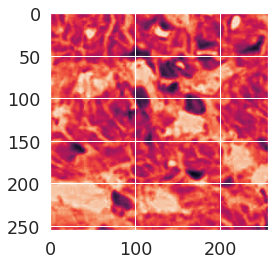

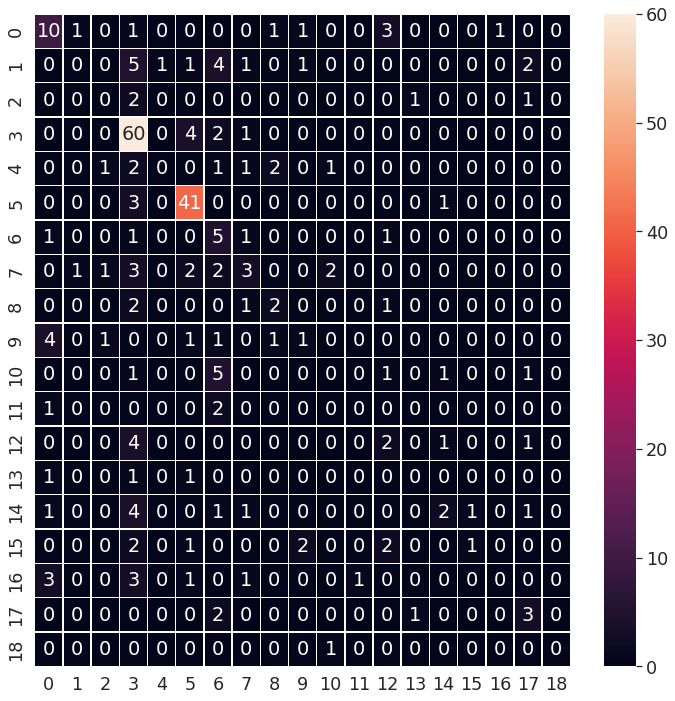

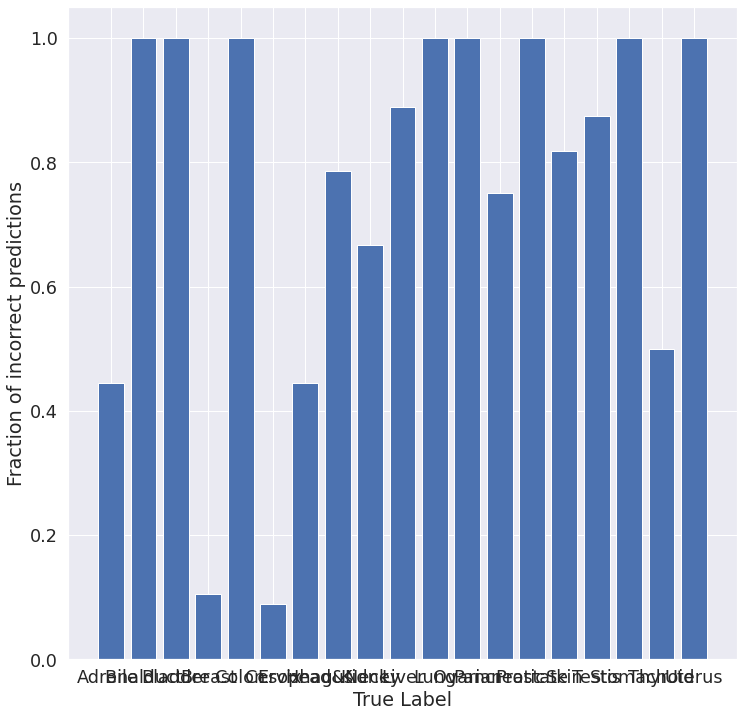

In [77]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test2[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])


print("True Label: ", class_names[np.argmax(y_test2[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(19), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(19), class_names)

**Ensembling model 1 and model 2**

In [78]:
model12 = [model1, model2]


In [79]:
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [80]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test2)
prediction2 = model2.predict(x_test2)


In [81]:
accuracy1 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test2, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.48221343873517786
Accuracy Score for model2 =  0.39920948616600793
Accuracy Score for average ensemble =  0.5138339920948617


In [82]:
#Weighted average ensemble
models = [model1, model2] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
weights = [.5,.5] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), weighted_ensemble_prediction)

In [83]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.48221343873517786
Accuracy Score for model2 =  0.39920948616600793
Accuracy Score for average ensemble =  0.5138339920948617
Accuracy Score for weighted average ensemble =  0.48221343873517786


In [84]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
ideal_weights = [.5,.5] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)


Predicted Label:  Breast
True Label:  Skin


([<matplotlib.axis.XTick at 0x7fcd1a28a990>,
 [Text(0, 0, 'Adrenal'),
  Text(0, 0, 'Bile duct'),
  Text(0, 0, 'Bladder'),
  Text(0, 0, 'Breast'),
  Text(0, 0, 'Colon'),
  Text(0, 0, 'Cervix'),
  Text(0, 0, 'Esophagus'),
  Text(0, 0, 'Head&Neck'),
  Text(0, 0, 'Kidney'),
  Text(0, 0, 'Liver'),
  Text(0, 0, 'Lung'),
  Text(0, 0, 'Ovarian'),
  Text(0, 0, 'Pancreatic'),
  Text(0, 0, 'Prostate'),
  Text(0, 0, 'Skin'),
  Text(0, 0, 'Testis'),
  Text(0, 0, 'Stomach'),
  Text(0, 0, 'Thyroid'),
  Text(0, 0, 'Uterus')])

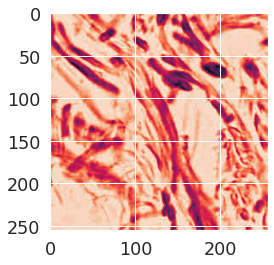

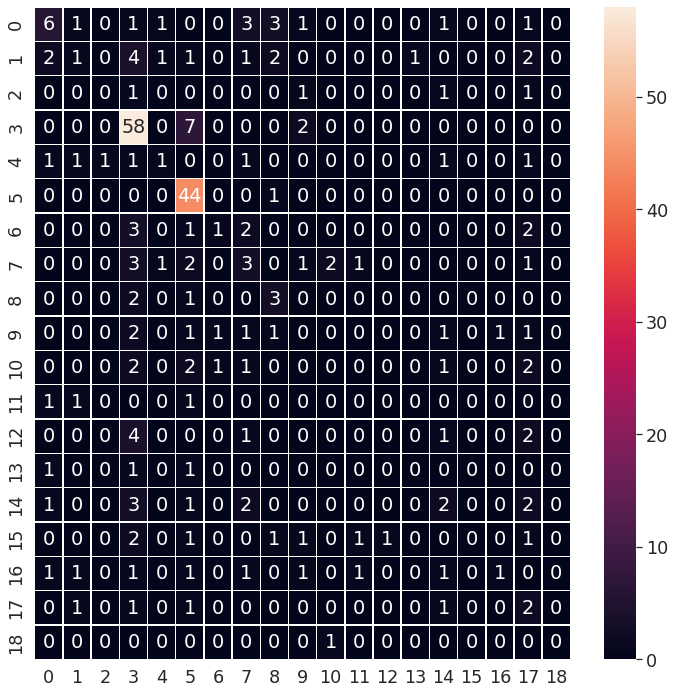

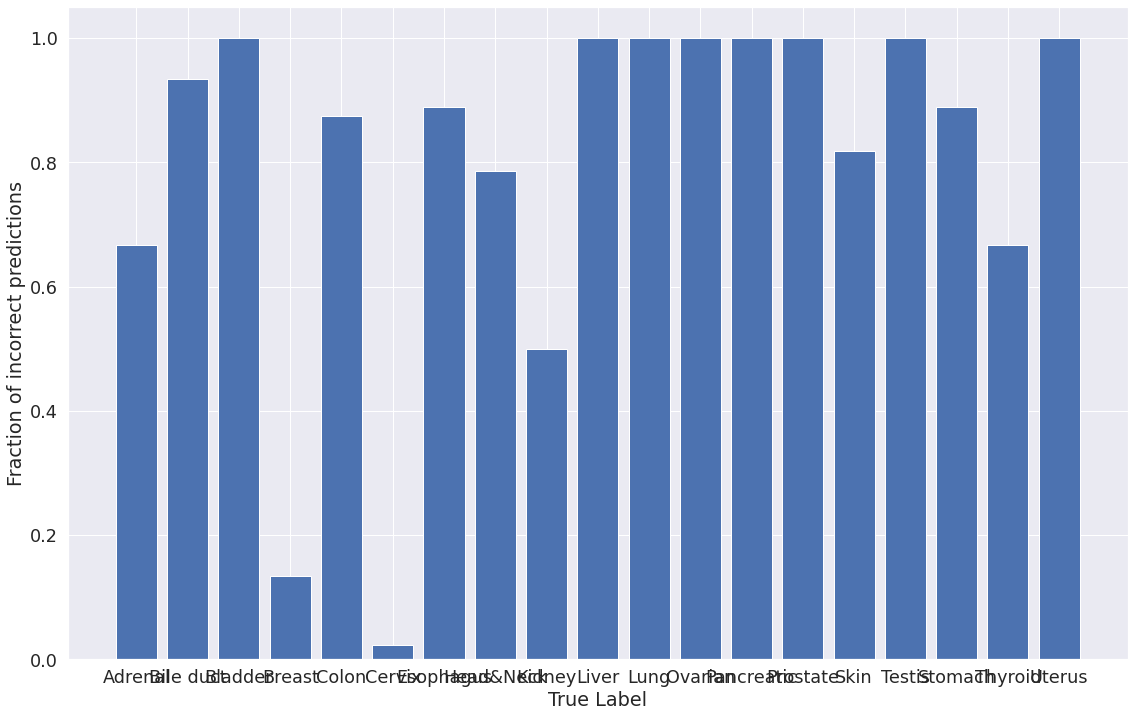

In [86]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test2[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[np.argmax(y_test2[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(19,12))
plt.bar(np.arange(19), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(19), class_names)



**Ensembling model 2 and model 3**

In [87]:
model23 = [model2, model3]

In [88]:
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [89]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test2)
prediction2 = model2.predict(x_test2)


In [90]:
accuracy1 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test2, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test2, axis=1), ensemble_prediction)

print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model2 =  0.48221343873517786
Accuracy Score for model3 =  0.39920948616600793
Accuracy Score for average ensemble =  0.48221343873517786


In [91]:
#Weighted average ensemble
models = [model2, model3] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
weights = [.5,.5] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), weighted_ensemble_prediction)

In [92]:
print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model2 =  0.48221343873517786
Accuracy Score for model3 =  0.39920948616600793
Accuracy Score for average ensemble =  0.48221343873517786
Accuracy Score for weighted average ensemble =  0.466403162055336


In [93]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test2) for model in models]
preds=np.array(preds)
ideal_weights = [.5,.5] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)


Predicted Label:  Cervix
True Label:  Cervix


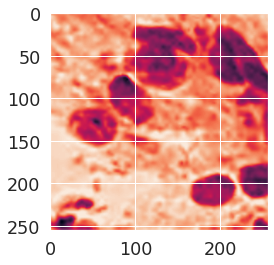

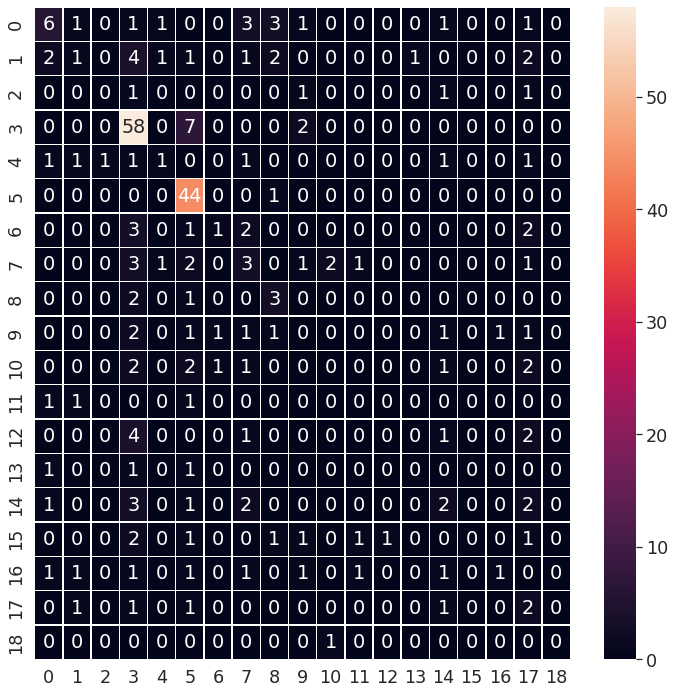

In [94]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test2[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[np.argmax(y_test2[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test2, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

